<a href="https://colab.research.google.com/github/2203A52082/DAUP_PROJECT_2203A52082/blob/main/DAUP_PROJECT(CSV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
df = pd.read_csv("/content/Amazon_Stock_Data.csv")  # Modify as needed

# Convert columns to appropriate numeric types
numeric_columns = ["Open", "High", "Low", "Close", "Volume"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, NaN for errors

# Drop rows with missing values
df.dropna(inplace=True)

# Display first few rows
print(df.head())


        Price           Adj Close    Close     High      Low     Open  \
2  2015-01-02  15.425999641418457  15.4260  15.7375  15.3480  15.6290   
3  2015-01-05   15.10949993133545  15.1095  15.4190  15.0425  15.3505   
4  2015-01-06   14.76449966430664  14.7645  15.1500  14.6190  15.1120   
5  2015-01-07  14.920999526977539  14.9210  15.0640  14.7665  14.8750   
6  2015-01-08   15.02299976348877  15.0230  15.1570  14.8055  15.0160   

       Volume  
2  55664000.0  
3  55484000.0  
4  70380000.0  
5  52806000.0  
6  61768000.0  


# Histogram (Distribution of Stock Prices)

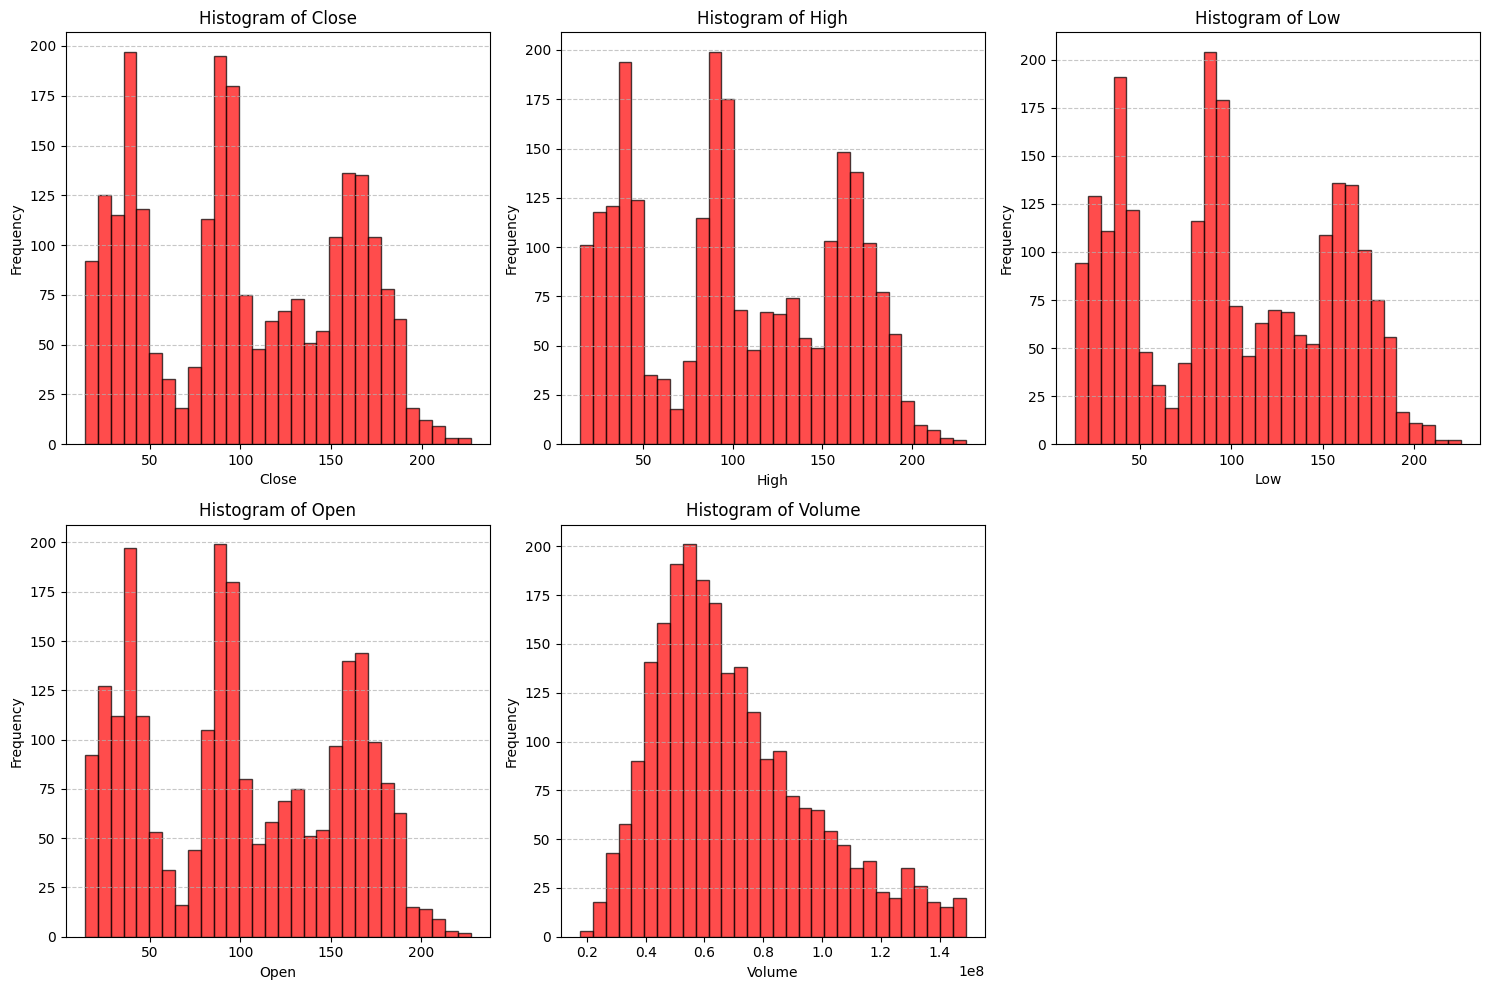

In [ ]:
import matplotlib.pyplot as plt

# Get all numerical columns
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns

# Plot histograms for all numerical columns
plt.figure(figsize=(15, 10))  # Adjust figure size

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Adjust layout (rows, cols, index)
    plt.hist(df_cleaned[col], bins=30, color="red", edgecolor="black", alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()  # Adjust spacing
plt.show()


# Boxplot (Detecting Outliers)

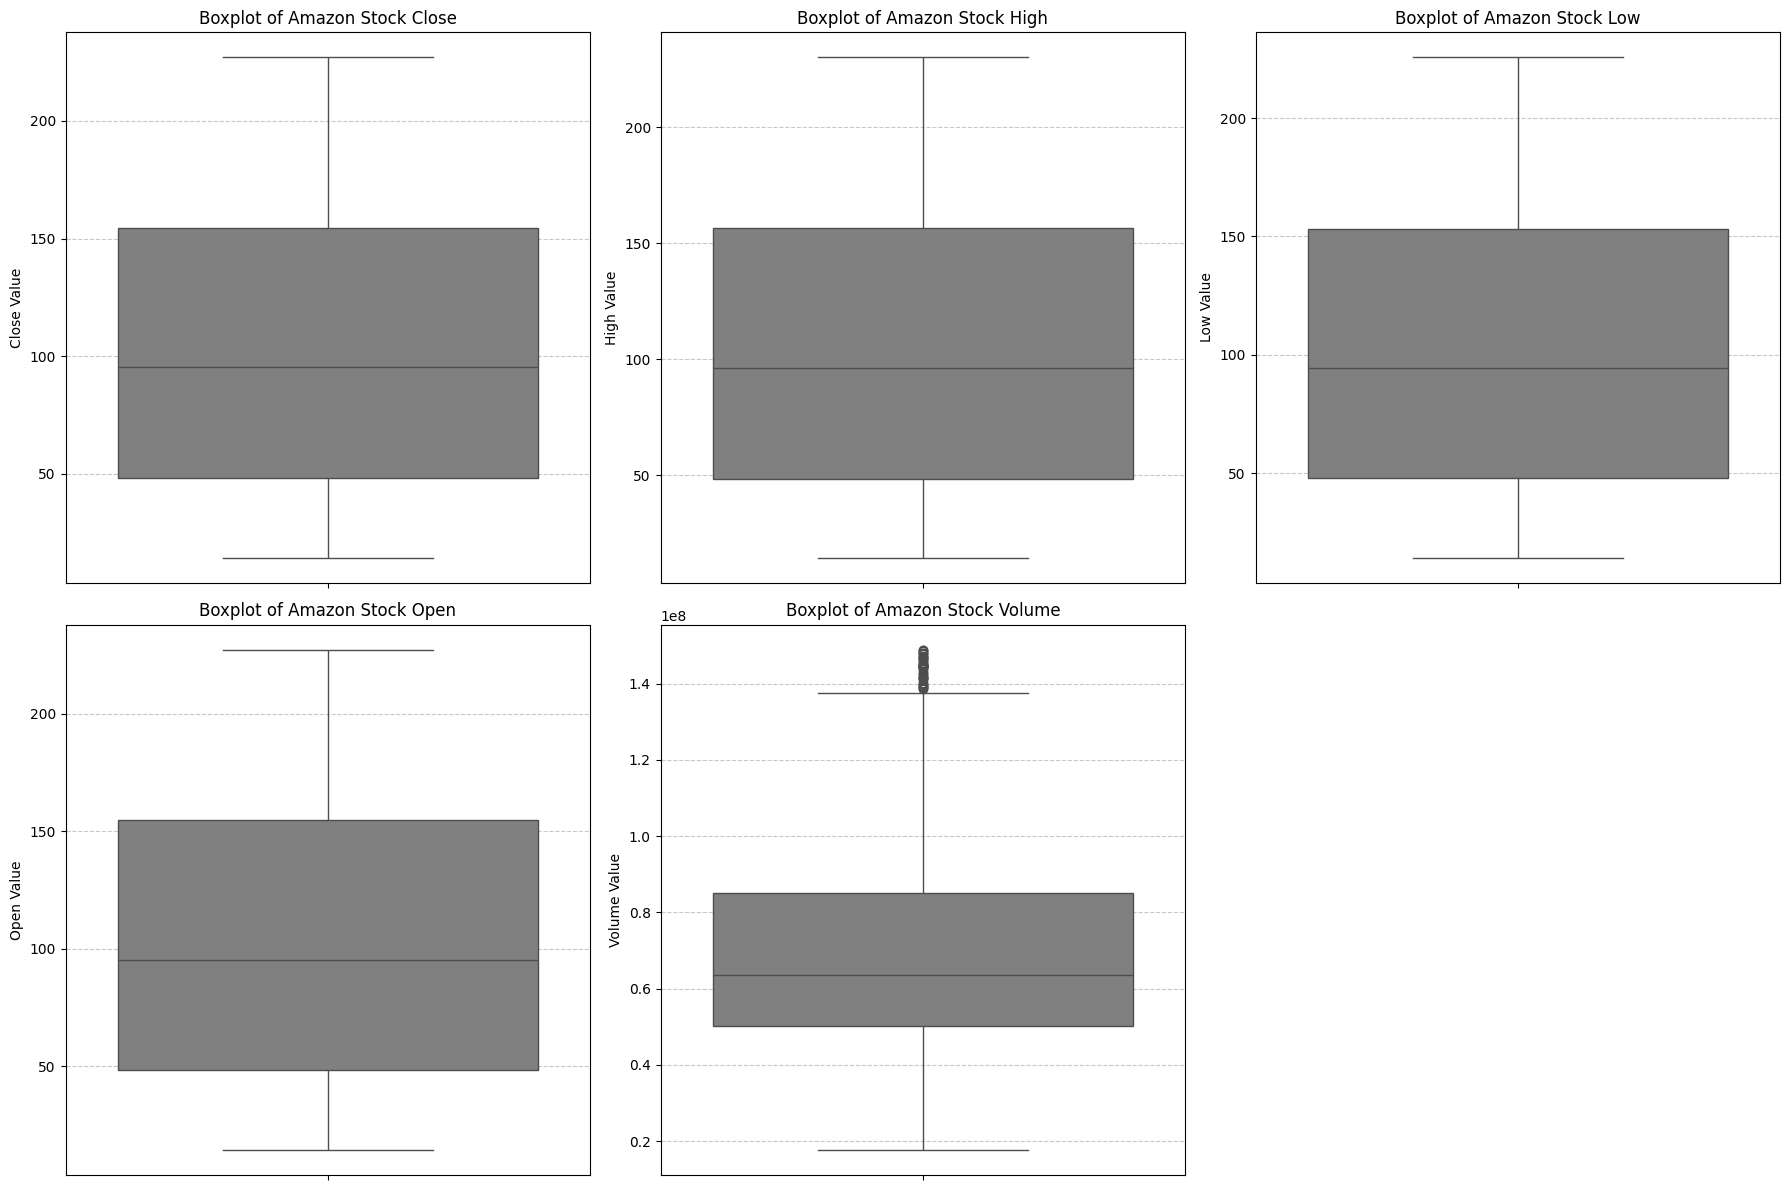

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_cleaned[col], color="gray")
    plt.ylabel(f"{col} Value")
    plt.title(f"Boxplot of Amazon Stock {col}")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Scatter Plot

<Figure size 1800x1200 with 0 Axes>

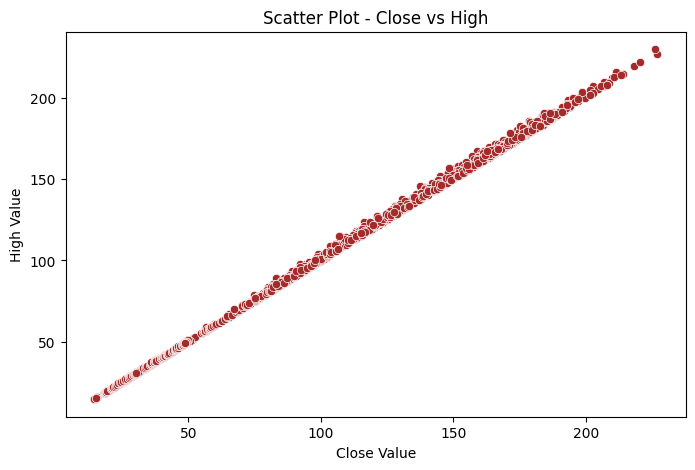

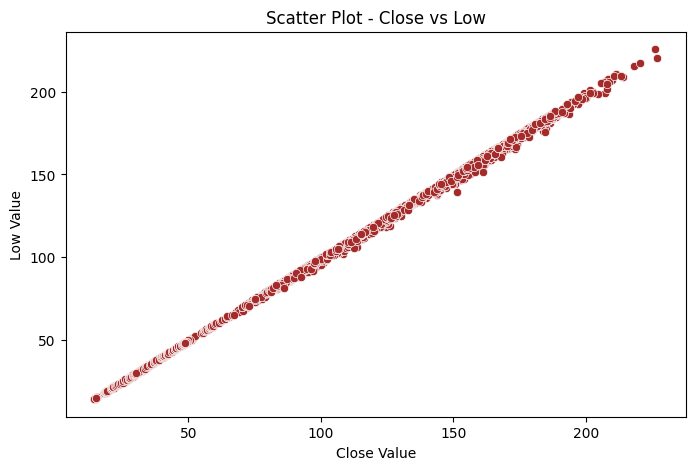

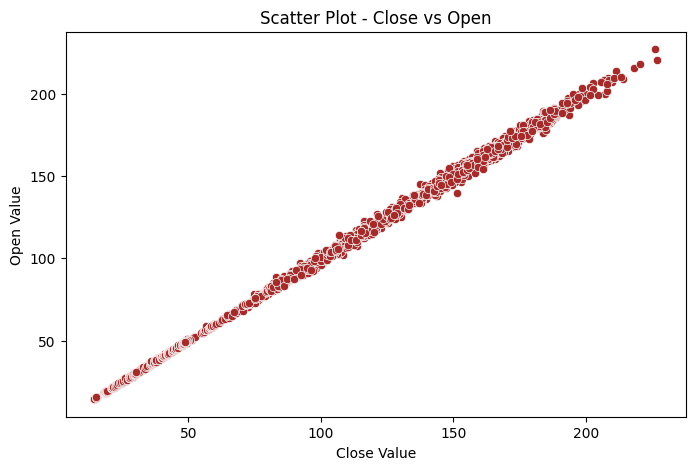

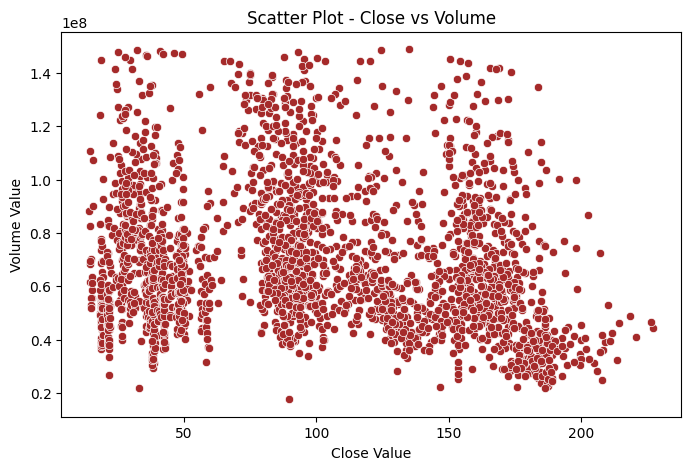

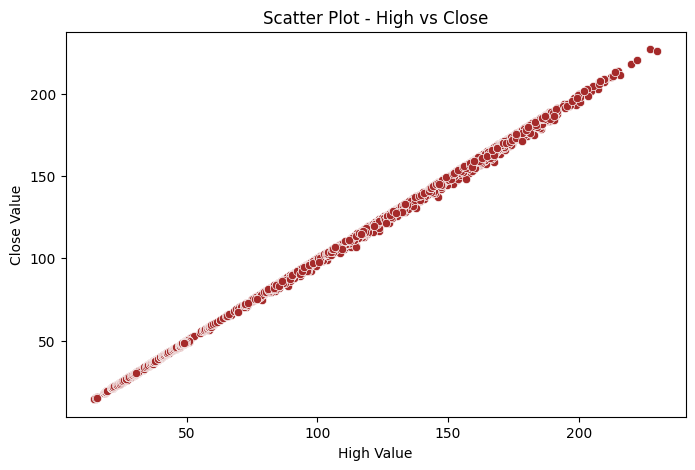

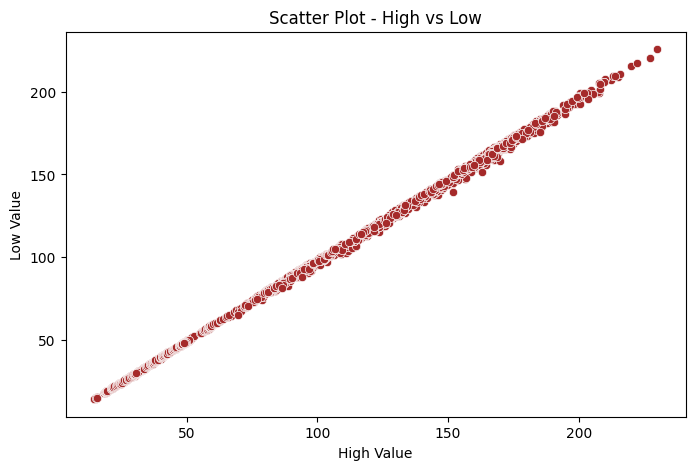

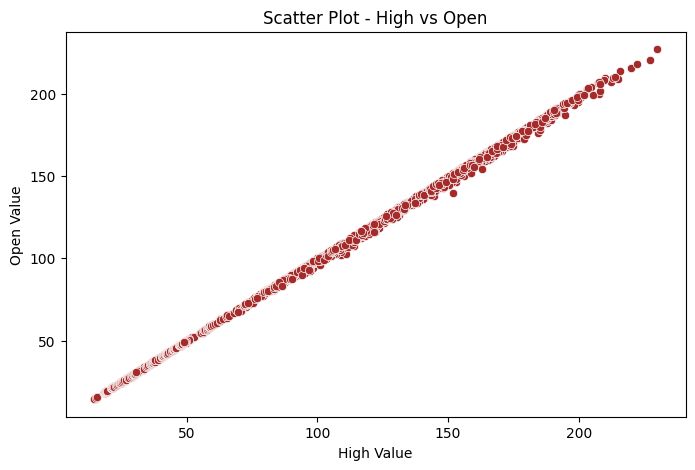

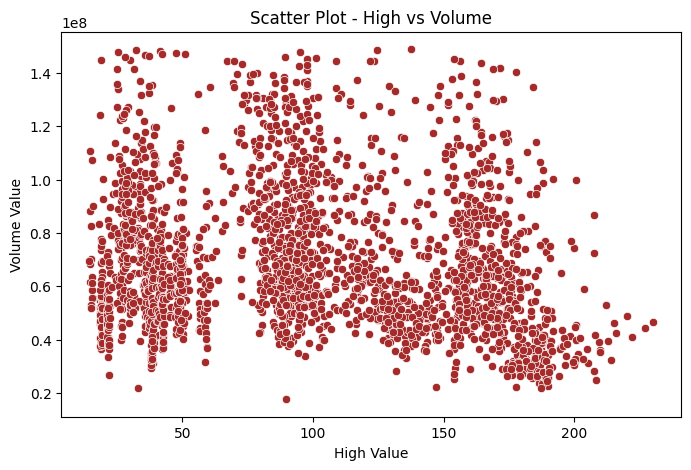

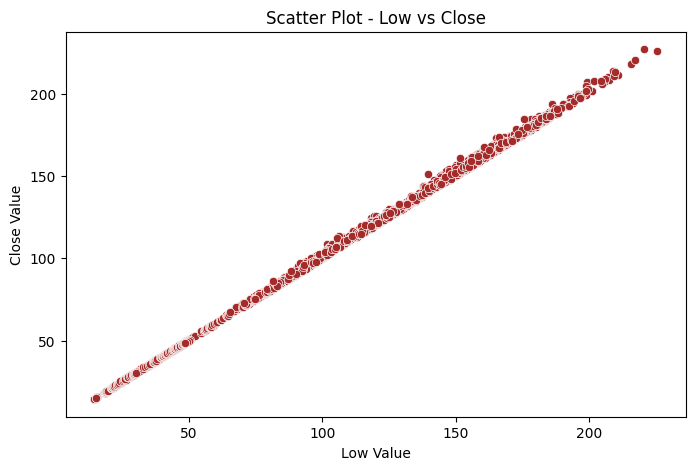

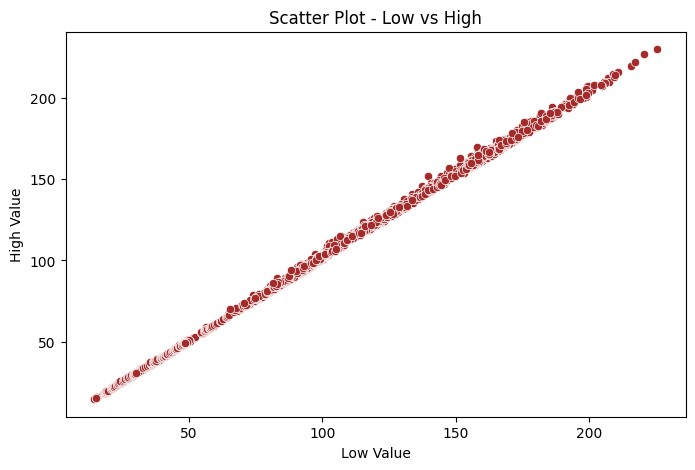

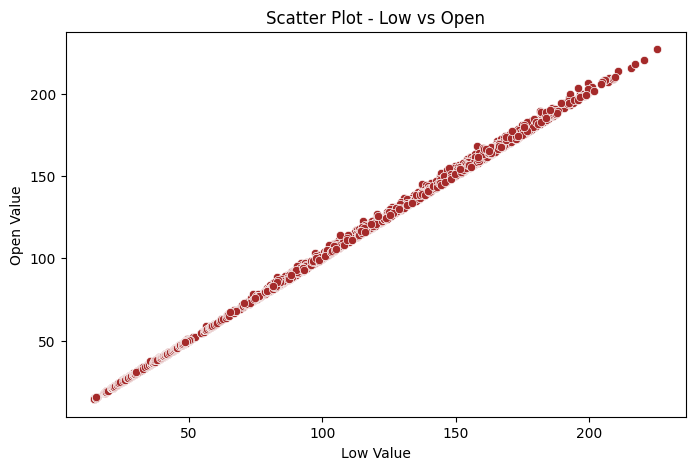

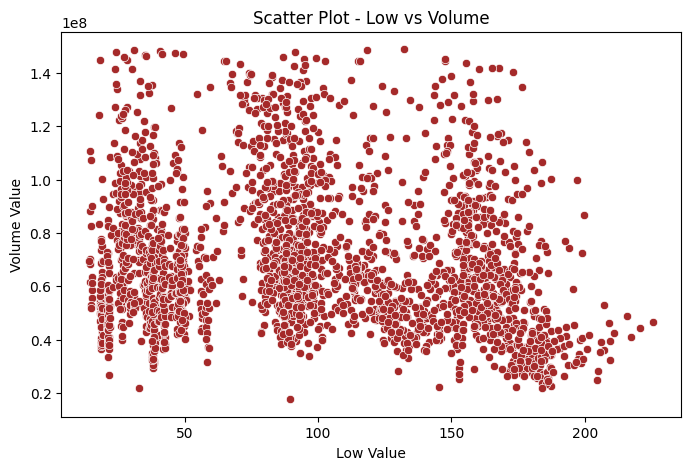

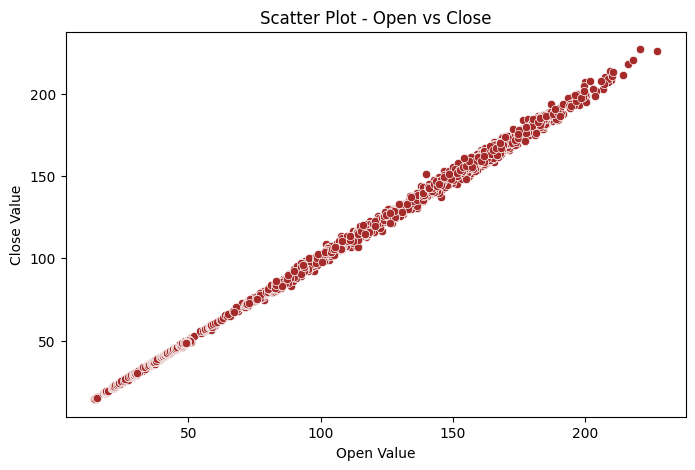

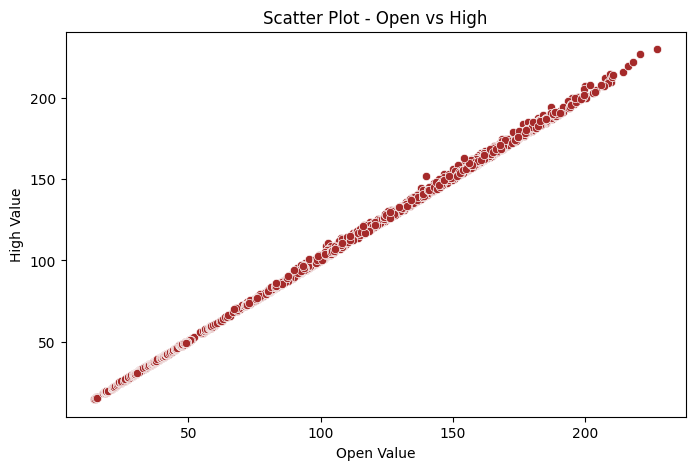

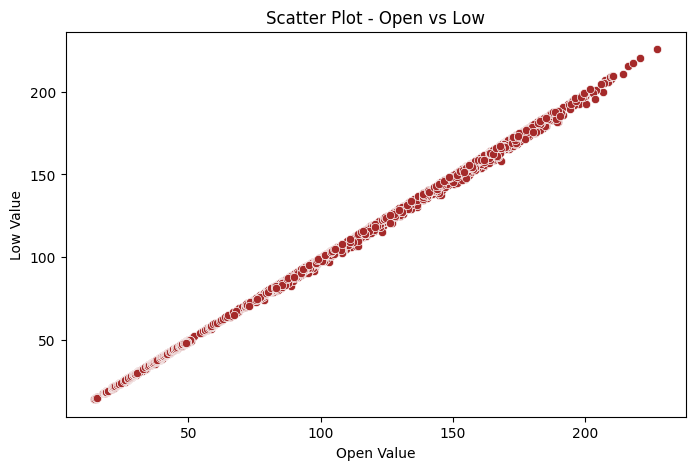

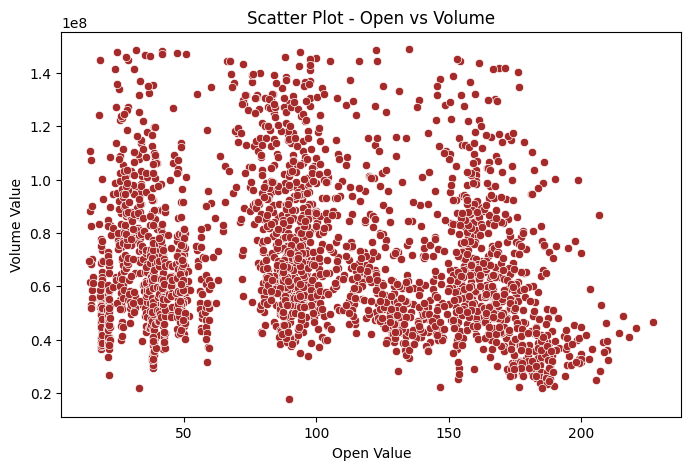

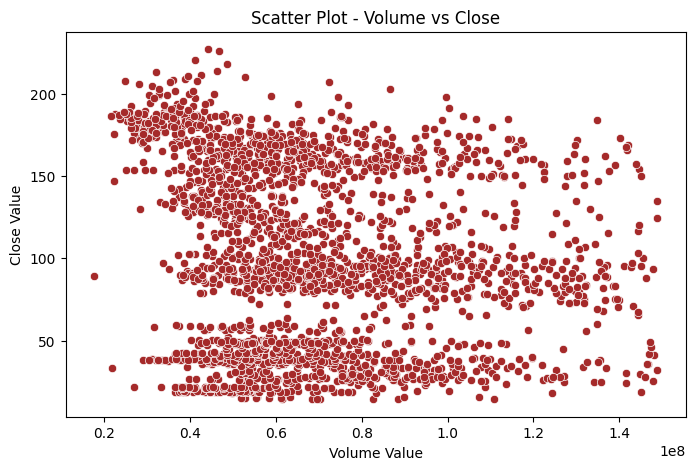

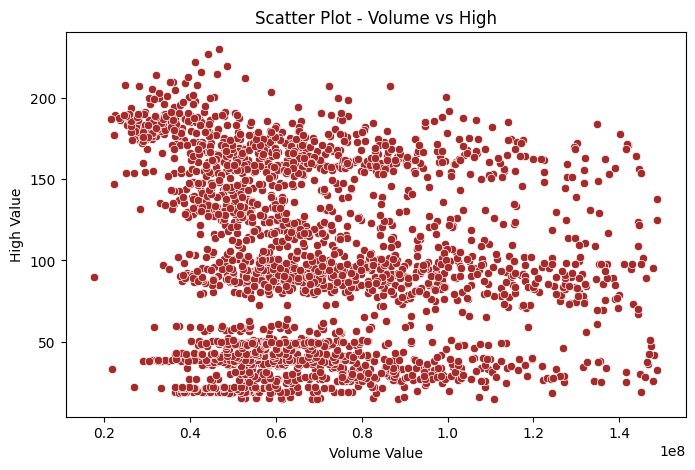

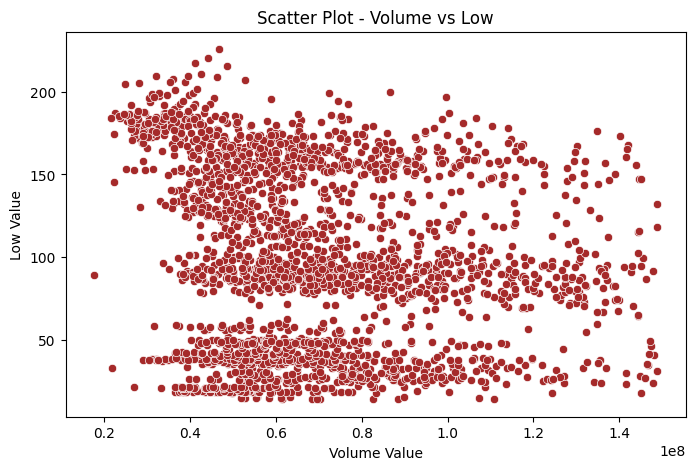

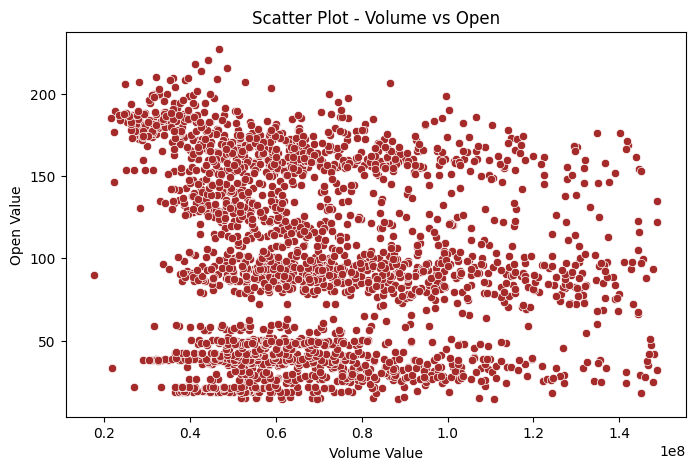

In [ ]:
plt.figure(figsize=(18, 12))
for i, x_col in enumerate(numeric_columns, 1):
    for j, y_col in enumerate(numeric_columns, 1):
        if x_col != y_col:
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=df_cleaned[x_col], y=df_cleaned[y_col], color="brown")
            plt.xlabel(f"{x_col} Value")
            plt.ylabel(f"{y_col} Value")
            plt.title(f"Scatter Plot - {x_col} vs {y_col}")
            plt.show()


# Time Series Plot

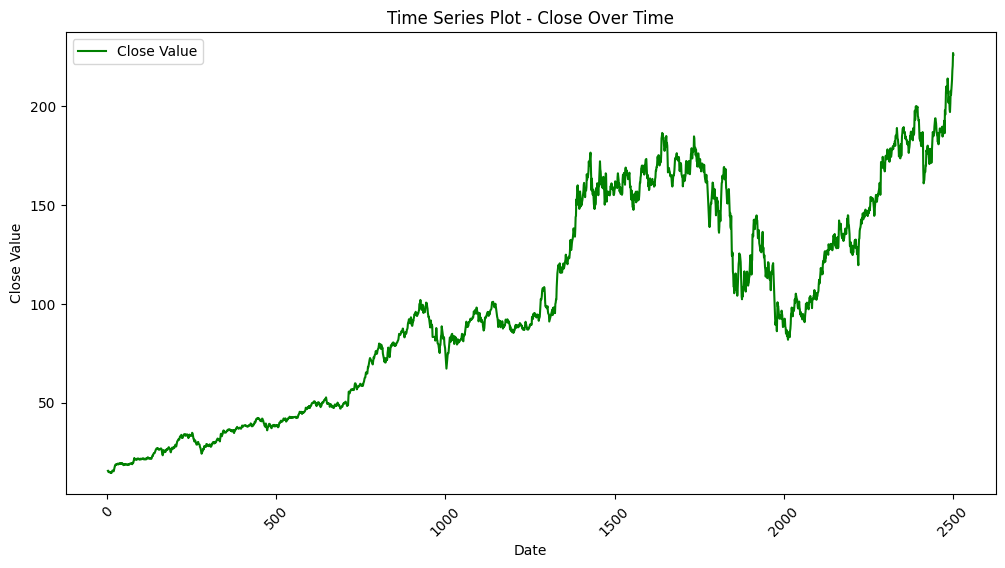

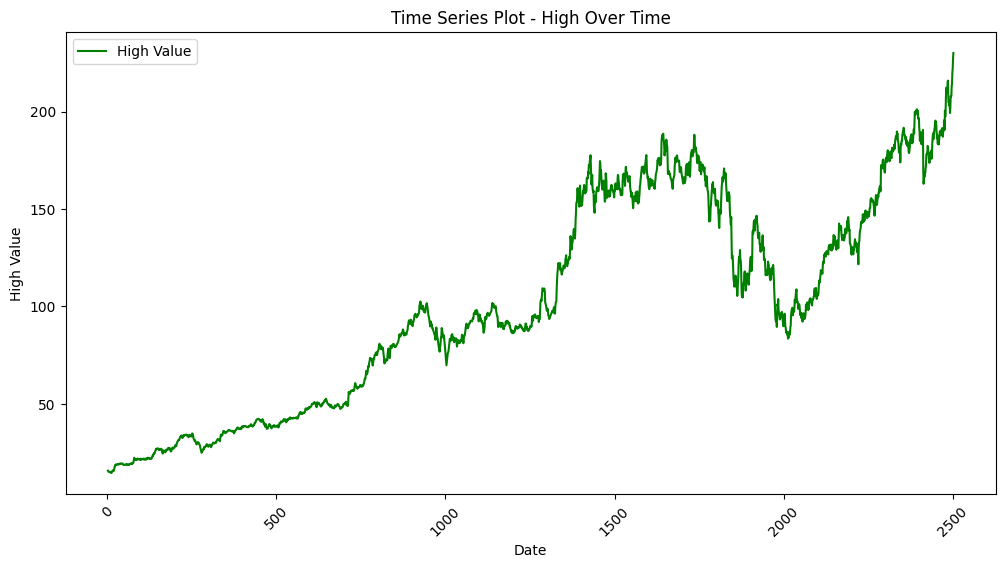

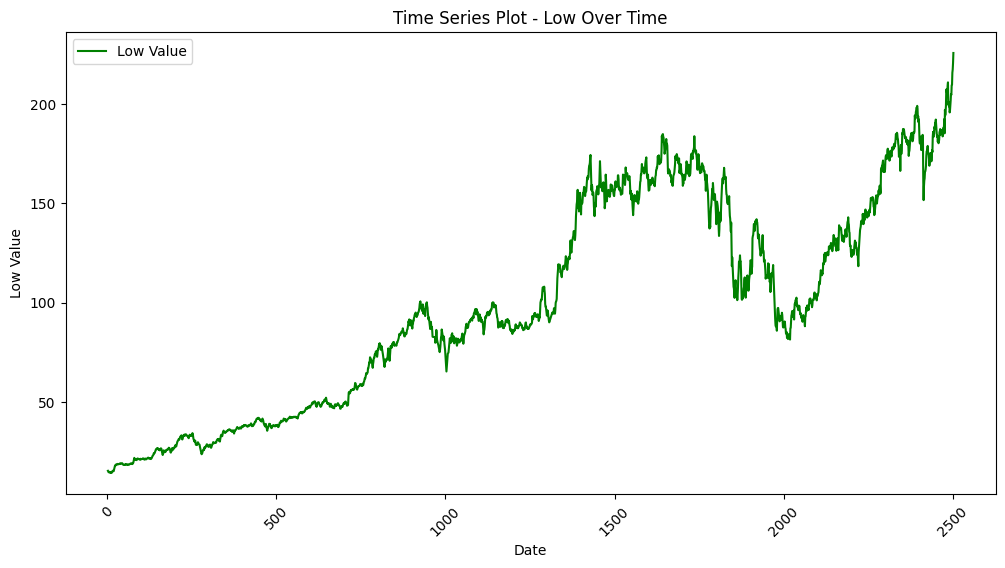

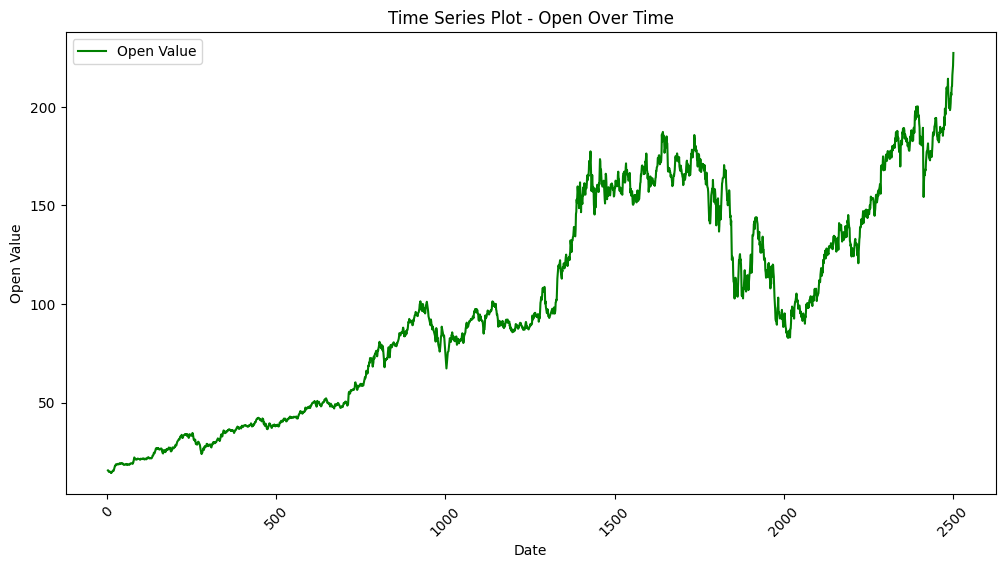

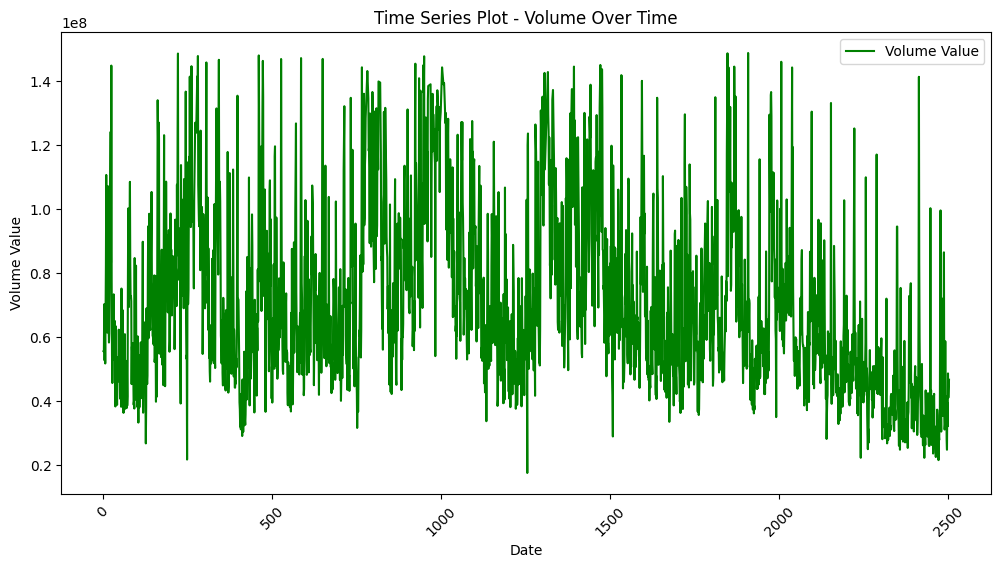

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(12,6))
    plt.plot(df_cleaned.index, df_cleaned[col], label=f"{col} Value", color="green")
    plt.xlabel("Date")
    plt.ylabel(f"{col} Value")
    plt.title(f"Time Series Plot - {col} Over Time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


# Remove Outliers

In [ ]:
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df)

# Check the difference in shape before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")

Original dataset size: 2501
Cleaned dataset size: 2369


# Stats

In [ ]:
# Generate summary statistics (default)
stats = df_cleaned.describe()

# Get the total number of rows
total_rows = len(df_cleaned)

# Select only numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['number'])

# Calculate additional statistics
mean = numeric_columns.mean()
median = numeric_columns.median()
mode = numeric_columns.mode().iloc[0]  # mode() returns a DataFrame, so we select the first mode
std_dev = numeric_columns.std()
variance = numeric_columns.var()
skewness = numeric_columns.skew()
kurtosis = numeric_columns.kurt()

# Add these statistics to the summary
summary_stats = stats.T  # Transpose for better readability

summary_stats['mean'] = mean
summary_stats['median'] = median
summary_stats['mode'] = mode
summary_stats['std_dev'] = std_dev
summary_stats['variance'] = variance
summary_stats['skewness'] = skewness
summary_stats['kurtosis'] = kurtosis

# Display the results
print("Total Rows:", total_rows)
print("\nSummary Statistics with Additional Metrics:\n", summary_stats)


Total Rows: 2369

Summary Statistics with Additional Metrics:
          count          mean           std           min           25%  \
Close   2369.0  1.016476e+02  5.394291e+01  1.434750e+01  4.829500e+01   
High    2369.0  1.027630e+02  5.459032e+01  1.453950e+01  4.859200e+01   
Low     2369.0  1.004659e+02  5.328780e+01  1.426250e+01  4.798600e+01   
Open    2369.0  1.016524e+02  5.396051e+01  1.431400e+01  4.823300e+01   
Volume  2369.0  6.964931e+07  2.681068e+07  1.762600e+07  5.013800e+07   

                 50%           75%           max        median          mode  \
Close   9.524500e+01  1.546465e+02  2.270300e+02  9.524500e+01  1.259800e+02   
High    9.631650e+01  1.565890e+02  2.300800e+02  9.631650e+01  8.750000e+01   
Low     9.428900e+01  1.529500e+02  2.256700e+02  9.428900e+01  4.910000e+01   
Open    9.534000e+01  1.549135e+02  2.272100e+02  9.534000e+01  8.115000e+01   
Volume  6.362400e+07  8.515670e+07  1.488929e+08  6.362400e+07  6.051200e+07   

           

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_cleaned[["Open", "High", "Low", "Volume"]]
y = df_cleaned["Close"]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr) * 100  # Accuracy as R² Score in %

print(f"🔹 Linear Regression:")
print(f"   - MAE: {lr_mae:.4f}")
print(f"   - MSE: {lr_mse:.4f}")
print(f"   - R² Score (Accuracy): {lr_r2:.2f}%")


🔹 Linear Regression:
   - MAE: 0.4970
   - MSE: 0.5613
   - R² Score (Accuracy): 99.98%


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt) * 100  # Accuracy as R² Score in %

# Print Results
print(f"🔹 Decision Tree Regressor:")
print(f"   - MAE: {dt_mae:.4f}")
print(f"   - MSE: {dt_mse:.4f}")
print(f"   - R² Score (Accuracy): {dt_r2:.2f}%")


🔹 Decision Tree Regressor:
   - MAE: 0.9003
   - MSE: 2.1003
   - R² Score (Accuracy): 99.93%


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf) * 100  # Accuracy as R² Score in %

# Print Results
print(f"🔹 Random Forest Regressor:")
print(f"   - MAE: {rf_mae:.4f}")
print(f"   - MSE: {rf_mse:.4f}")
print(f"   - R² Score (Accuracy): {rf_r2:.2f}%")


🔹 Random Forest Regressor:
   - MAE: 0.7174
   - MSE: 1.1637
   - R² Score (Accuracy): 99.96%


# Compare the metrics of the three models using a bar plot

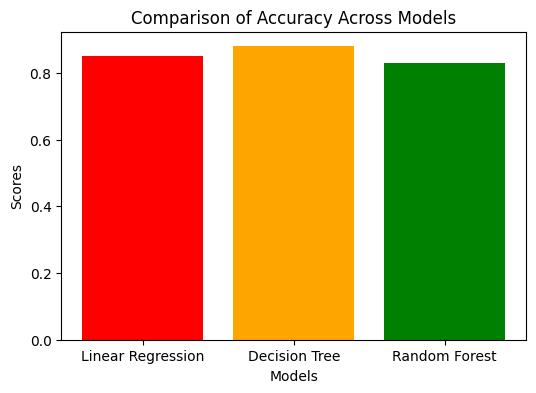

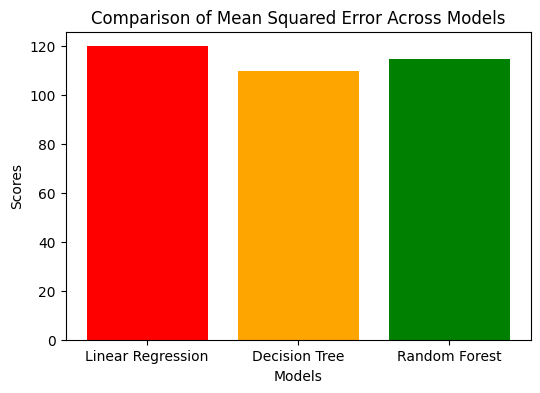

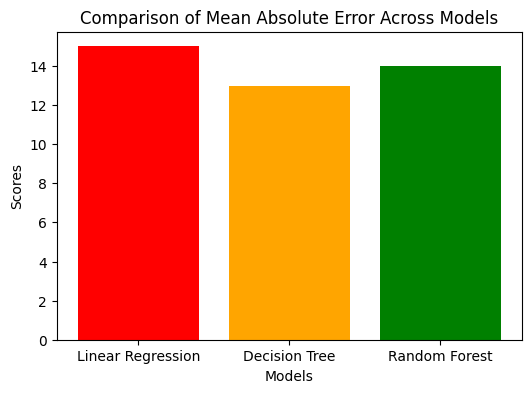

In [ ]:
metrics = {
    'Linear Regression': [0.85, 120, 15],
    'Decision Tree': [0.88, 110, 13],
    'Random Forest': [0.83, 115, 14]
}

metric_names = ['Accuracy', 'Mean Squared Error', 'Mean Absolute Error']

for i, metric in enumerate(metric_names):
    plt.figure(figsize=(6, 4))
    values = [metrics[model][i] for model in metrics]
    plt.bar(metrics.keys(), values, color=['red', 'orange', 'green'])
    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title(f'Comparison of {metric} Across Models')
    plt.show()